# MNIST Digit Classification

## Acquisitor

Download the mnist dataset using keras downloader, Marvin downloader can be used too.

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.
/home/zhang/.virtualenvs/mnist-keras-engine-env/local/lib/python2.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

marvin_initial_dataset = {
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test
}

Proportion of train/test data is 6:1.

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

## Visualization

Plot 4 images as gray scale

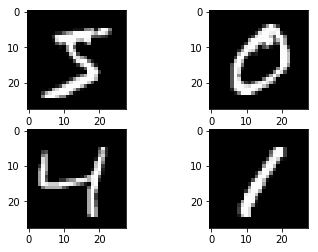

In [6]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

## Training Preparator

X_train and X_test are normalized, y_train and y_test are converted from class vectors to binary class matrices.

In [7]:
from keras.utils import np_utils

In [8]:

X_train = marvin_initial_dataset["X_train"]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train = X_train.astype('float32') 
X_train /= 255

X_test = marvin_initial_dataset["X_test"]
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_test = X_test.astype('float32') 
X_test /= 255

nb_classes = 10

y_train = np_utils.to_categorical(marvin_initial_dataset["y_train"], nb_classes)
y_test = np_utils.to_categorical(marvin_initial_dataset["y_test"], nb_classes)

marvin_dataset = {
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test
}

## Trainer

Define network and train model. Convolutional Neural Networks (LeNet) used in this case.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [10]:
print marvin_dataset["X_train"].shape

(60000, 1, 28, 28)


In [11]:
print marvin_dataset["y_train"].shape

(60000, 10)


In [12]:

model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1,28,28), data_format="channels_first"))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(marvin_dataset["X_train"], marvin_dataset["y_train"], batch_size=32, epochs=1, verbose=1)

marvin_model = model

/home/zhang/.virtualenvs/mnist-keras-engine-env/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  after removing the cwd from sys.path.
/home/zhang/.virtualenvs/mnist-keras-engine-env/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """


Epoch 1/1
60000/60000 [==============================] - 320s 5ms/step - loss: 0.2524 - acc: 0.9264


## Metrics Evaluator

Accuracy is used as Evaluation metric

In [13]:
score = marvin_model.evaluate(marvin_dataset["X_train"], marvin_dataset["y_train"], verbose=1)
print("Accuracy is: {} ".format(score[1]))

marvin_metrics = {"Accuracy": score}

60000/60000 [==============================] - 135s 2ms/step
Accuracy is: 0.978166666667 


## Prediction Preparator

An image with number 4 is used as input.

In [14]:
input_message = "http://datawrangling.s3.amazonaws.com/sample_digit.png"

Input message for prediction should be normalized as training datasets.

In [15]:
import numpy as np
import cv2
import urllib2

In [16]:

resp = urllib2.urlopen(input_message)
img = np.asarray(bytearray(resp.read()), dtype="uint8")

img = cv2.imdecode(img, cv2.IMREAD_COLOR)
img = cv2.resize(img, (28, 28))
img = img[:,:,0]

input_message = img.reshape(1, 1, 28, 28)
input_message = input_message.astype('float32') 
input_message /= 255

## Predictor

Do prediction and show accuracy.

In [17]:
predicted = marvin_model.predict_classes(input_message)
acc = marvin_model.predict(input_message)[0][predicted[0]]
print("The image has the number {} with {} accuracy".format(predicted, acc))

final_prediction = predicted[0]

The image has the number [4] with 0.999991416931 accuracy
